In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Data import
df=pd.read_csv("ONINE_FOOD_DELIVERY_ANALYSIS.csv")

In [8]:
df.head()

Order_ID Customer_ID  Customer_Age Customer_Gender     City     Area  \
0  ORD000001    CUST6948          19.0            Male      NaN  Central   
1  ORD000002    CUST6515           NaN          Female  Chennai    North   
2  ORD000003    CUST1765           NaN            Male    Delhi      NaN   
3  ORD000004    CUST2744           NaN            Male   Mumbai  Central   
4  ORD000005    CUST4389          57.0          Female  Chennai    South   

  Restaurant_ID Restaurant_Name Cuisine_Type  Order_Date  ... Final_Amount  \
0        RES936   Restaurant_29      Chinese  10/20/2024  ...          NaN   
1        RES689  Restaurant_419      Chinese   8/12/2024  ...       4849.0   
2        RES723  Restaurant_244      Arabian   12/8/2024  ...        737.0   
3        RES951  Restaurant_178      Chinese   10/8/2024  ...          NaN   
4        RES419  Restaurant_262      Chinese    2/4/2024  ...        352.0   

   Payment_Mode  Order_Status  Cancellation_Reason  Delivery_Partner_ID  \
0           UPI     Delivered                  NaN                DP563   
1           COD     Delivered                  NaN                DP369   
2        Wallet     Delivered                  NaN                DP580   
3           UPI     Cancelled        Late Delivery                DP155   
4          Card     Delivered                  NaN                DP728   

   Delivery_Rating Restaurant_Rating Order_Day Peak_Hour Profit_Margin  
0              5.0               4.4   Weekend      True          0.13  
1              5.0               4.7   Weekday      True          0.48  
2              4.0               4.9   Weekend      True          0.08  
3              2.0               3.4   Weekday       NaN          0.04  
4              2.0               4.4   Weekend     False          0.12  

[5 rows x 25 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Order_ID             100000 non-null  object 
 1   Customer_ID          100000 non-null  object 
 2   Customer_Age         49907 non-null   float64
 3   Customer_Gender      75144 non-null   object 
 4   City                 83274 non-null   object 
 5   Area                 83315 non-null   object 
 6   Restaurant_ID        100000 non-null  object 
 7   Restaurant_Name      100000 non-null  object 
 8   Cuisine_Type         83115 non-null   object 
 9   Order_Date           98986 non-null   object 
 10  Order_Time           98002 non-null   object 
 11  Delivery_Time_Min    66641 non-null   float64
 12  Distance_km          66530 non-null   float64
 13  Order_Value          66673 non-null   float64
 14  Discount_Applied     83285 non-null   float64
 15  Final_Amount      

In [10]:
df.isnull().sum()


Order_ID                   0
Customer_ID                0
Customer_Age           50093
Customer_Gender        24856
City                   16726
Area                   16685
Restaurant_ID              0
Restaurant_Name            0
Cuisine_Type           16885
Order_Date              1014
Order_Time              1998
Delivery_Time_Min      33359
Distance_km            33470
Order_Value            33327
Discount_Applied       16715
Final_Amount           55697
Payment_Mode           19911
Order_Status               0
Cancellation_Reason    90969
Delivery_Partner_ID        0
Delivery_Rating        16523
Restaurant_Rating          0
Order_Day                  0
Peak_Hour              32962
Profit_Margin              0
dtype: int64

In [11]:
(df.isnull().sum() / len(df)) * 100


Order_ID                0.000
Customer_ID             0.000
Customer_Age           50.093
Customer_Gender        24.856
City                   16.726
Area                   16.685
Restaurant_ID           0.000
Restaurant_Name         0.000
Cuisine_Type           16.885
Order_Date              1.014
Order_Time              1.998
Delivery_Time_Min      33.359
Distance_km            33.470
Order_Value            33.327
Discount_Applied       16.715
Final_Amount           55.697
Payment_Mode           19.911
Order_Status            0.000
Cancellation_Reason    90.969
Delivery_Partner_ID     0.000
Delivery_Rating        16.523
Restaurant_Rating       0.000
Order_Day               0.000
Peak_Hour              32.962
Profit_Margin           0.000
dtype: float64

In [12]:
# Customer_Age is  50%data missing  so dropped the column
df.drop('Customer_Age', axis=1, inplace=True)

In [13]:

 df['Customer_Gender'].fillna(df['Customer_Gender'].mode()[0], inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)
# Mode imputation
df['Area'].fillna(df['Area'].mode()[0], inplace=True)


In [14]:
# Mode imputation
df['Cuisine_Type'].fillna(df['Cuisine_Type'].mode()[0], inplace=True)


In [15]:
# 1️⃣ Convert Order_Date to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

In [16]:
mode_date = df['Order_Date'].mode()[0]
df['Order_Date'].fillna(mode_date, inplace=True)


In [ ]:
#Order_Time  fields contain null values only
df.drop('Order_Time', axis=1, inplace=True)


In [ ]:
#Handling missing values 

In [ ]:

df['Delivery_Time_Min'].fillna(df['Delivery_Time_Min'].median(), inplace=True)


In [19]:
df['Distance_km'].fillna(df['Distance_km'].median(), inplace=True)


In [20]:
df['Order_Value'].fillna(df['Order_Value'].median(), inplace=True)



In [21]:
df['Discount_Applied'].fillna(df['Discount_Applied'].median(), inplace=True)


In [ ]:
df['Final_Amount'].fillna(df['Order_Value'] - df['Discount_Applied'], inplace=True)


In [23]:
df['Payment_Mode'].fillna(df['Payment_Mode'].mode()[0], inplace=True)


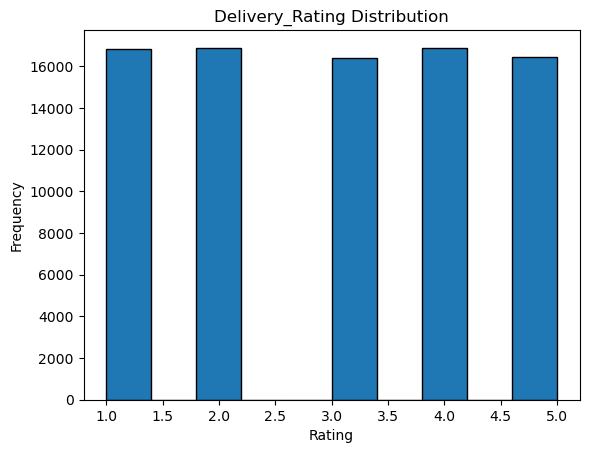

In [ ]:
# Finding the Distribution

plt.hist(df['Delivery_Rating'].dropna(), bins=10, edgecolor='black')
plt.title('Delivery_Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


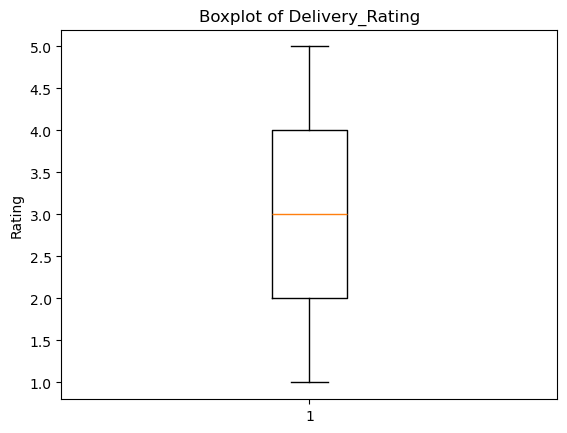

In [ ]:
#Checking outliers

plt.boxplot(df['Delivery_Rating'].dropna())
plt.title('Boxplot of Delivery_Rating')
plt.ylabel('Rating')
plt.show()


In [ ]:
# Calculate the mean of Delivery_Rating (ignoring missing values)
mean_rating = df['Delivery_Rating'].mean()
# # # Fill missing values with the mean
df['Delivery_Rating'].fillna(mean_rating, inplace=True)

In [ ]:
mode_val = df['Peak_Hour'].mode()
if not mode_val.empty:
     df['Peak_Hour'].fillna(mode_val.iloc[0], inplace=True)


In [24]:


# Find the mode of Cancellation_Reason (ignoring NaN)
mode_reason = df.loc[df['Order_Status'] == 'Cancelled', 'Cancellation_Reason'].mode()[0]

# Fill missing values
df.loc[df['Order_Status'] == 'Delivered', 'Cancellation_Reason'] = \
    df.loc[df['Order_Status'] == 'Delivered', 'Cancellation_Reason'].fillna('Not Cancel')

df.loc[df['Order_Status'] == 'Cancelled', 'Cancellation_Reason'] = \
    df.loc[df['Order_Status'] == 'Cancelled', 'Cancellation_Reason'].fillna(mode_reason)



In [25]:
df['Cancellation_Reason']

0           Not Cancel
1           Not Cancel
2           Not Cancel
3        Late Delivery
4           Not Cancel
             ...      
99995       Not Cancel
99996       Not Cancel
99997    Late Delivery
99998       Not Cancel
99999    Late Delivery
Name: Cancellation_Reason, Length: 100000, dtype: object

In [26]:
(df['Cancellation_Reason'].isnull().sum() / len(df)) * 100

np.float64(0.0)

In [46]:
df.columns

Index(['Order_ID', 'Customer_ID', 'Customer_Gender', 'City', 'Area',
       'Restaurant_ID', 'Restaurant_Name', 'Cuisine_Type', 'Order_Date',
       'Delivery_Time_Min', 'Distance_km', 'Order_Value', 'Discount_Applied',
       'Final_Amount', 'Payment_Mode', 'Order_Status', 'Cancellation_Reason',
       'Delivery_Partner_ID', 'Delivery_Rating', 'Restaurant_Rating',
       'Order_Day', 'Peak_Hour', 'Profit_Margin'],
      dtype='object')

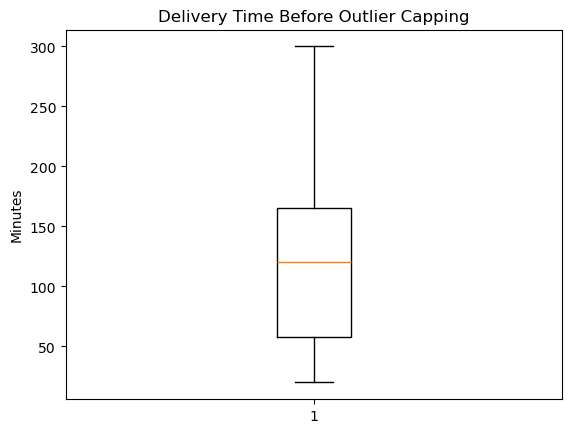

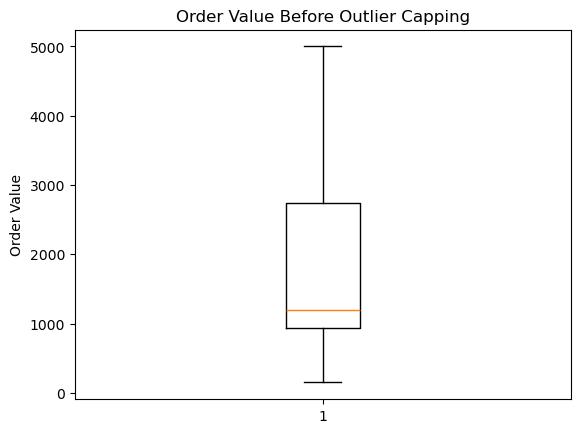

In [50]:


# Box plot before capping
plt.figure()
plt.boxplot(df['Delivery_Time_Min'].dropna())
plt.title('Delivery Time Before Outlier Capping')
plt.ylabel('Minutes')
plt.show()

plt.figure()
plt.boxplot(df['Order_Value'].dropna())
plt.title('Order Value Before Outlier Capping')
plt.ylabel('Order Value')
plt.show()


In [ ]:
fig = px.box(
    df,
    y='Delivery_Time_Min',
    title='Delivery Time Box Plot (Plotly)'
)
fig.show()


In [22]:
df['Delivery_Time_Min'].describe()

count    100000.000000
mean        124.982030
std          74.211956
min          20.000000
25%          58.000000
50%         120.000000
75%         165.000000
max         300.000000
Name: Delivery_Time_Min, dtype: float64

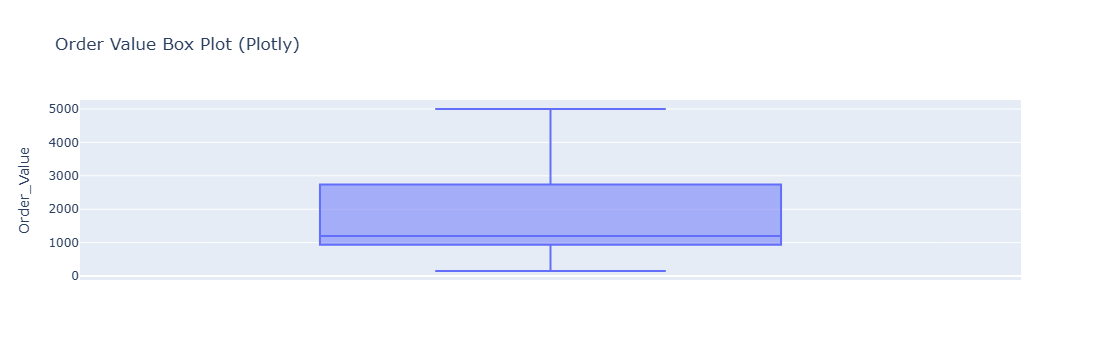

In [80]:
fig = px.box(
    df,
    y='Order_Value',
    title='Order Value Box Plot (Plotly)'
)
fig.show()

In [207]:
# ●	Removing or capping outliers (delivery time, order value)


Q1 = df['Delivery_Time_Min'].quantile(0.25)
Q3 = df['Delivery_Time_Min'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df['Delivery_Time_Min'] = df['Delivery_Time_Min'].clip(
    lower=lower_limit,
    upper=upper_limit
)



Q1 = df['Order_Value'].quantile(0.25)
Q3 = df['Order_Value'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df['Order_Value'] = df['Order_Value'].clip(
    lower=lower_limit,
    upper=upper_limit
)



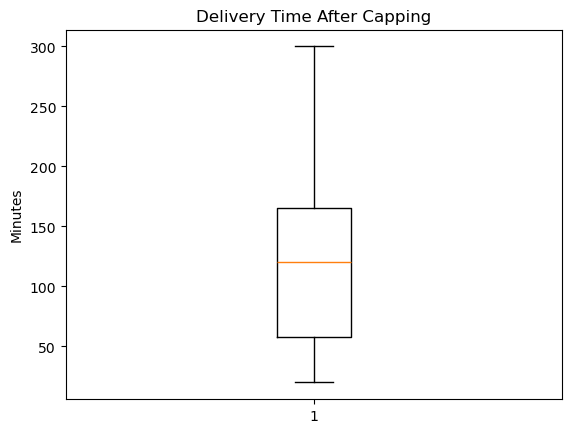

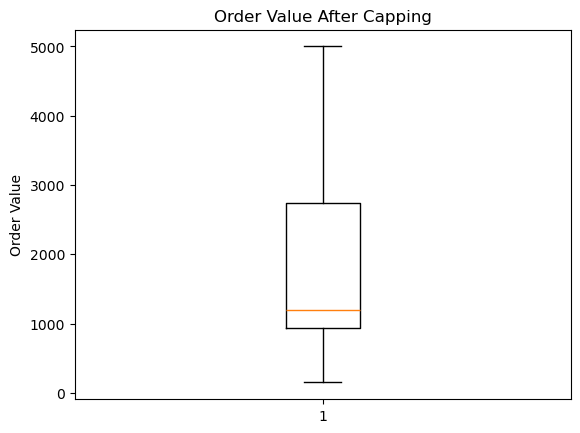

In [53]:
plt.figure()
plt.boxplot(df['Delivery_Time_Min'].dropna())
plt.title('Delivery Time After Capping')
plt.ylabel('Minutes')
plt.show()

plt.figure()
plt.boxplot(df['Order_Value'].dropna())
plt.title('Order Value After Capping')
plt.ylabel('Order Value')
plt.show()

In [ ]:
# “The data is right-skewed, but does not contain extreme statistical outliers.”

In [27]:
# ●	Correcting invalid values (ratings > 5, negative profit margin)


# df['Delivery_Rating'] = df['Delivery_Rating'].clip(lower=1, upper=5)
# df['Restaurant_Rating'] = df['Restaurant_Rating'].clip(lower=1, upper=5)





if 'Delivery_Rating'  in df.columns:
    df.loc[df['Delivery_Rating']>5,'Delivery_Rating']=5
    df.loc[df['Delivery_Rating']<0,'Delivery_Rating']=0

if 'Restaurant_Rating'  in df.columns:
    df.loc[df['Restaurant_Rating']>5,'Restaurant_Rating']=5
    df.loc[df['Restaurant_Rating']<0,'Restaurant_Rating']=0
    


In [28]:
df['Profit_Margin'] = df['Profit_Margin'].apply(
    lambda x: 0 if x < 0 else x
)


In [25]:
df[['Delivery_Rating','Restaurant_Rating','Profit_Margin']].describe()


Delivery_Rating  Restaurant_Rating  Profit_Margin
count    100000.000000      100000.000000  100000.000000
mean          2.991531           4.199779       0.178838
std           1.292009           0.654037       0.166049
min           1.000000           3.000000       0.000000
25%           2.000000           3.600000       0.000000
50%           2.991531           4.200000       0.150000
75%           4.000000           4.900000       0.320000
max           5.000000           5.000000       0.500000

In [68]:
df.columns


Index(['Order_ID', 'Customer_ID', 'Customer_Gender', 'City', 'Area',
       'Restaurant_ID', 'Restaurant_Name', 'Cuisine_Type', 'Order_Date',
       'Delivery_Time_Min', 'Distance_km', 'Order_Value', 'Discount_Applied',
       'Final_Amount', 'Payment_Mode', 'Order_Status', 'Cancellation_Reason',
       'Delivery_Partner_ID', 'Delivery_Rating', 'Restaurant_Rating',
       'Order_Day', 'Peak_Hour', 'Profit_Margin'],
      dtype='object')

In [29]:
cat_col=['Customer_Gender','Cuisine_Type','Payment_Mode','Order_Status','Cancellation_Reason']
for col in cat_col:
    df[col]=df[col].str.lower().str.strip()

In [30]:
df['Customer_Gender']=df['Customer_Gender'].replace({'m':'male','f':'female','o':'other'})

In [31]:
df[df['Order_Status']=='cancelled'][['Delivery_Rating','Restaurant_Rating','Delivery_Time_Min']].head()

Delivery_Rating  Restaurant_Rating  Delivery_Time_Min
3               2.0                3.4              143.0
15              NaN                4.1              214.0
31              NaN                3.2              140.0
36              1.0                3.8              132.0
38              2.0                5.0               31.0

In [33]:
# no delivery no delivery time
df.loc[df['Order_Status']=='cancelled','Delivery_Time_Min']=np.nan

In [34]:
df[df['Order_Status']=='cancelled'][['Order_Status','Delivery_Time_Min']]

Order_Status  Delivery_Time_Min
3        cancelled                NaN
15       cancelled                NaN
31       cancelled                NaN
36       cancelled                NaN
38       cancelled                NaN
...            ...                ...
99960    cancelled                NaN
99985    cancelled                NaN
99994    cancelled                NaN
99997    cancelled                NaN
99999    cancelled                NaN

[15036 rows x 2 columns]

In [35]:
# no delivery no rating
df.loc[df['Order_Status']=='cancelled','Restaurant_Rating']=np.nan

In [36]:
df[df['Order_Status']=='cancelled'][['Order_Status','Restaurant_Rating']]

Order_Status  Restaurant_Rating
3        cancelled                NaN
15       cancelled                NaN
31       cancelled                NaN
36       cancelled                NaN
38       cancelled                NaN
...            ...                ...
99960    cancelled                NaN
99985    cancelled                NaN
99994    cancelled                NaN
99997    cancelled                NaN
99999    cancelled                NaN

[15036 rows x 2 columns]

In [37]:
# no delivery no revenue
df.loc[df['Order_Status'].str.contains('cancelled',na=False),'Profit_Margin']=0


In [38]:
df[df['Order_Status']=='cancelled'][['Order_Status','Profit_Margin']]

Order_Status  Profit_Margin
3        cancelled            0.0
15       cancelled            0.0
31       cancelled            0.0
36       cancelled            0.0
38       cancelled            0.0
...            ...            ...
99960    cancelled            0.0
99985    cancelled            0.0
99994    cancelled            0.0
99997    cancelled            0.0
99999    cancelled            0.0

[15036 rows x 2 columns]

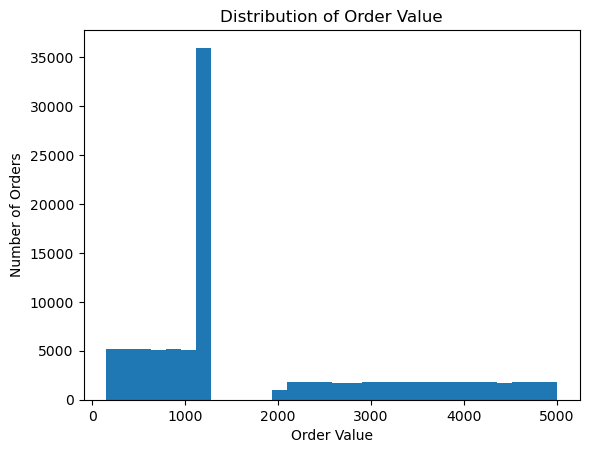

In [93]:
# ●	Distribution of order values and delivery time


plt.figure()
plt.hist(df['Order_Value'], bins=30)
plt.xlabel('Order Value')
plt.ylabel('Number of Orders')
plt.title('Distribution of Order Value')
plt.show()


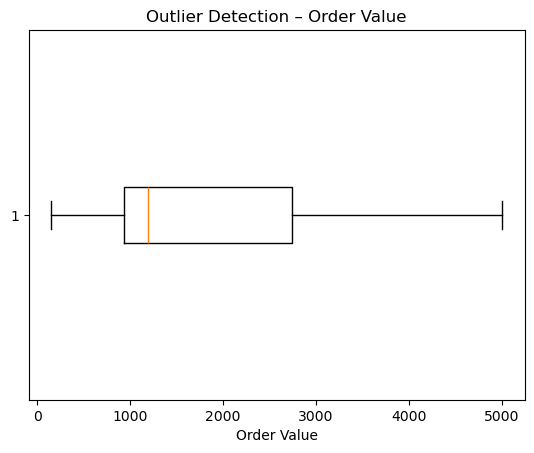

In [94]:
# outlier
plt.figure()
plt.boxplot(df['Order_Value'], vert=False)
plt.xlabel('Order Value')
plt.title('Outlier Detection – Order Value')
plt.show()

In [96]:
df['Order_Value'].describe()

count    100000.00000
mean       1786.94279
std        1335.39821
min         150.00000
25%         935.00000
50%        1197.00000
75%        2743.00000
max        5000.00000
Name: Order_Value, dtype: float64

In [100]:
Q1 = df['Order_Value'].quantile(0.25)
Q3 = df['Order_Value'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Lower Bound: -1777.0
Upper Bound: 5455.0


In [101]:
outliers = df[
    (df['Order_Value'] < lower_bound) |
    (df['Order_Value'] > upper_bound)
]

outliers.shape


(0, 23)

In [102]:
outlier_percentage = len(outliers) / len(df) * 100
print(f"Outlier Percentage: {outlier_percentage:.2f}%")


Outlier Percentage: 0.00%


In [ ]:
# deliverytime

In [115]:
df_delivered = df[df['Order_Status'] == 'delivered']
df_cancelled = df[df['Order_Status'] == 'cancelled']


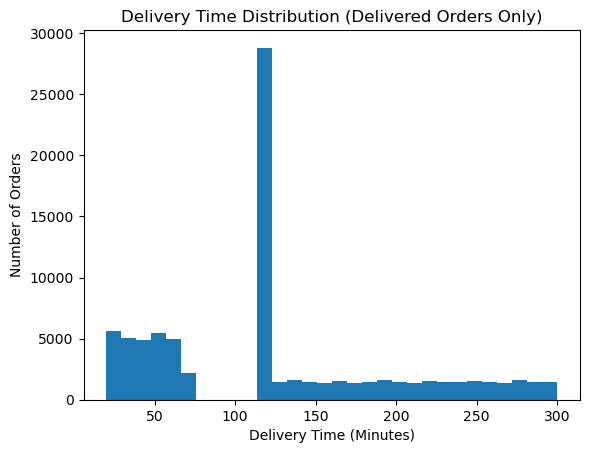

In [117]:
plt.figure()
plt.hist(df_delivered['Delivery_Time_Min'], bins=30)
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Number of Orders')
plt.title('Delivery Time Distribution (Delivered Orders Only)')
plt.show()


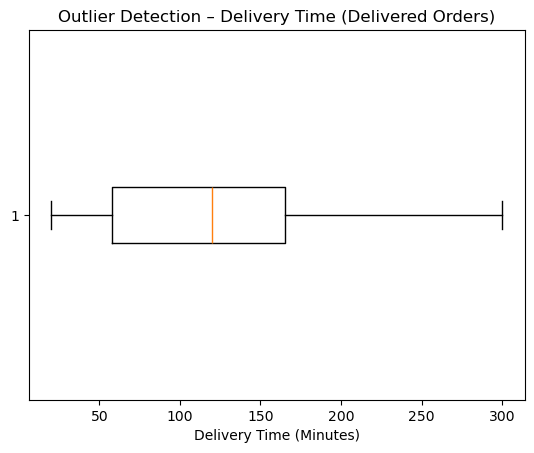

In [118]:
# outliers
plt.figure()
plt.boxplot(df_delivered['Delivery_Time_Min'].dropna(), vert=False)
plt.xlabel('Delivery Time (Minutes)')
plt.title('Outlier Detection – Delivery Time (Delivered Orders)')
plt.show()


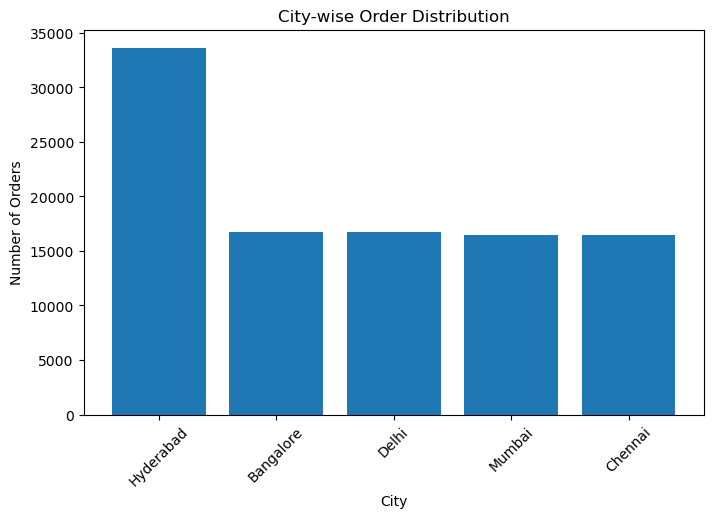

In [119]:
# City-wise Order Analysis



city_counts = df['City'].value_counts()

plt.figure(figsize=(8,5))
plt.bar(city_counts.index, city_counts.values)
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.title('City-wise Order Distribution')
plt.xticks(rotation=45)
plt.show()


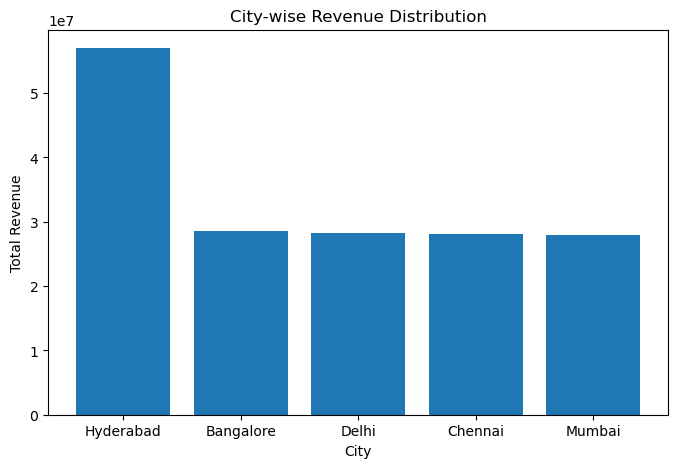

In [120]:


# Calculate total revenue per city
city_revenue = df.groupby('City')['Final_Amount'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
plt.bar(city_revenue.index, city_revenue.values)
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.title('City-wise Revenue Distribution')
plt.show()


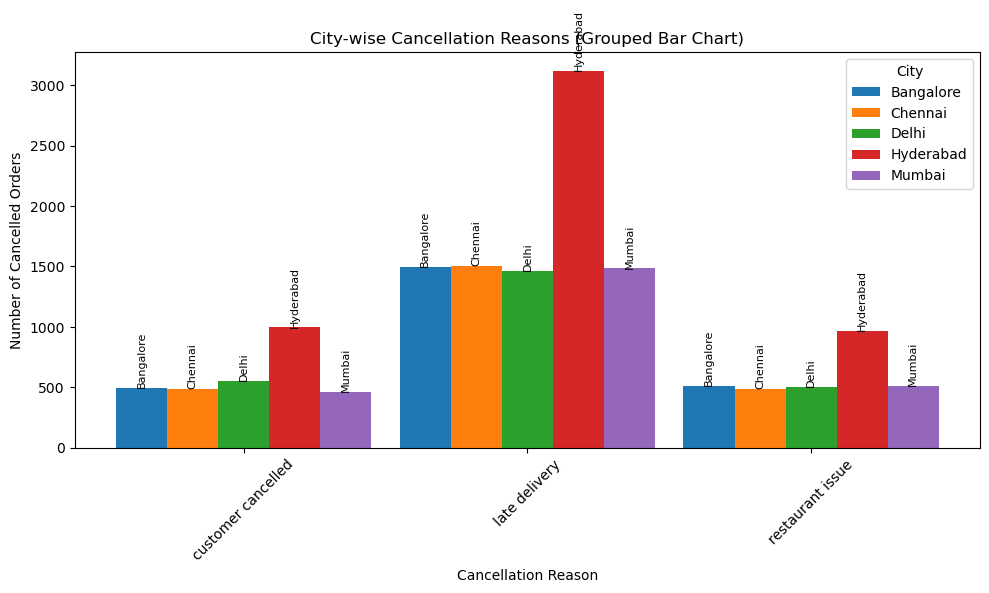

In [125]:
# city wise cancel reason
df_cancelled = df[df['Order_Status'] == 'cancelled']
pivot_cancel = df_cancelled.pivot_table(
    index='Cancellation_Reason',
    columns='City',
    aggfunc='size',
    fill_value=0
)
# import matplotlib.pyplot as plt
# import numpy as np

reasons = pivot_cancel.index
cities = pivot_cancel.columns

x = np.arange(len(reasons))
width = 0.18

plt.figure(figsize=(10,6))

for i, city in enumerate(cities):
    bars = plt.bar(
        x + i * width,
        pivot_cancel[city],
        width,
        label=city
    )
    
    # Add city name on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height,
            city,
            ha='center',
            va='bottom',
            fontsize=8,
            rotation=90
        )

plt.xlabel('Cancellation Reason')
plt.ylabel('Number of Cancelled Orders')
plt.title('City-wise Cancellation Reasons (Grouped Bar Chart)')
plt.xticks(x + width * (len(cities)-1)/2, reasons, rotation=45)
plt.legend(title='City')
plt.tight_layout()
plt.show()


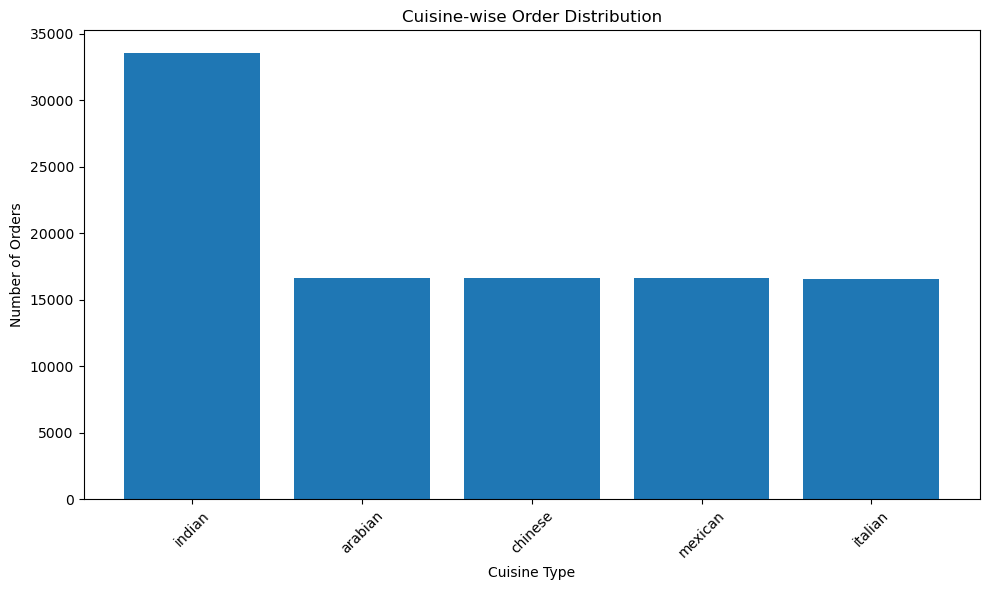

In [126]:
# cuisine-wise order analysis


# Count orders per cuisine
cuisine_orders = df['Cuisine_Type'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(cuisine_orders.index, cuisine_orders.values)

plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.title('Cuisine-wise Order Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


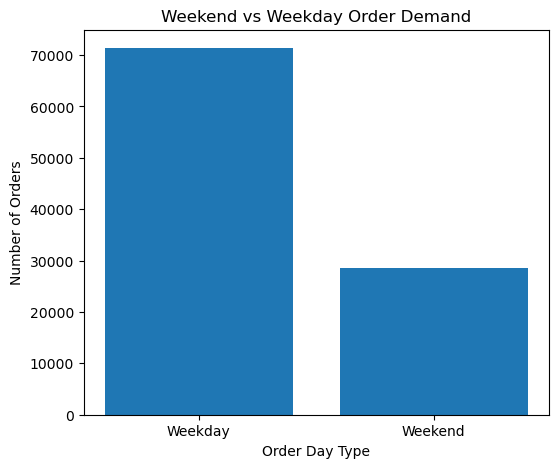

In [127]:

# weekday v weekend analysis

# Count orders directly
order_day_counts = df['Order_Day'].value_counts()

plt.figure(figsize=(6,5))
plt.bar(order_day_counts.index, order_day_counts.values)

plt.xlabel('Order Day Type')
plt.ylabel('Number of Orders')
plt.title('Weekend vs Weekday Order Demand')
plt.show()


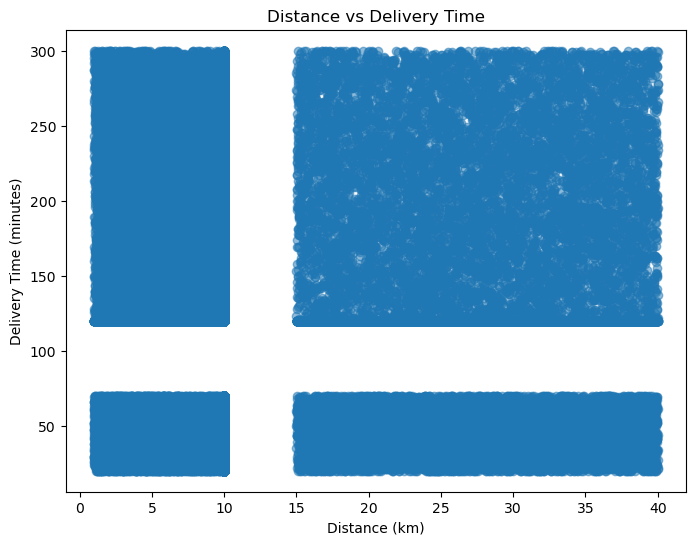

In [131]:
# ●	Distance vs delivery delay relationship



# Remove rows with missing distance or delivery time
df_valid = df.dropna(subset=['Distance_km', 'Delivery_Time_Min'])

import matplotlib.pyplot as plt

# Remove cancelled orders / missing delivery time
df_valid = df.dropna(subset=['Delivery_Time_Min'])

plt.figure(figsize=(8,6))
plt.scatter(df_valid['Distance_km'], df_valid['Delivery_Time_Min'], alpha=0.5)

plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (minutes)')
plt.title('Distance vs Delivery Time')
plt.show()



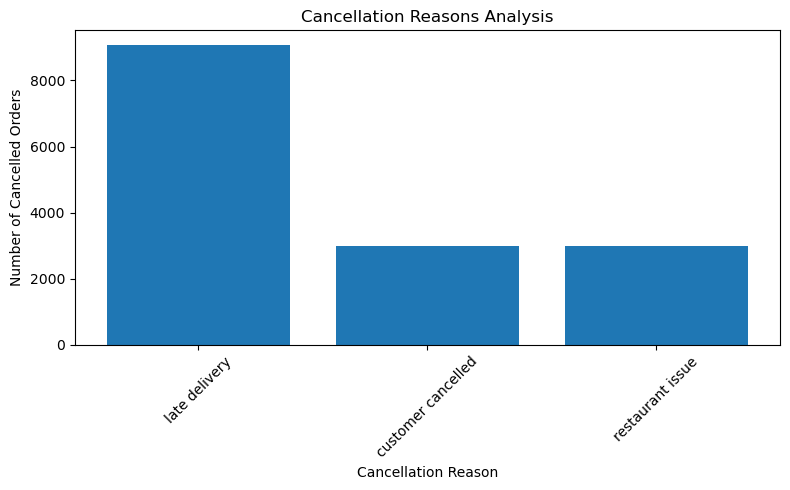

In [133]:
# ●	Cancellation reasons analysis

cancelled_df = df[df['Order_Status'] == 'cancelled']


cancel_reason_counts = cancelled_df['Cancellation_Reason'].value_counts()

plt.figure(figsize=(8,5))
plt.bar(cancel_reason_counts.index, cancel_reason_counts.values)

plt.xlabel('Cancellation Reason')
plt.ylabel('Number of Cancelled Orders')
plt.title('Cancellation Reasons Analysis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



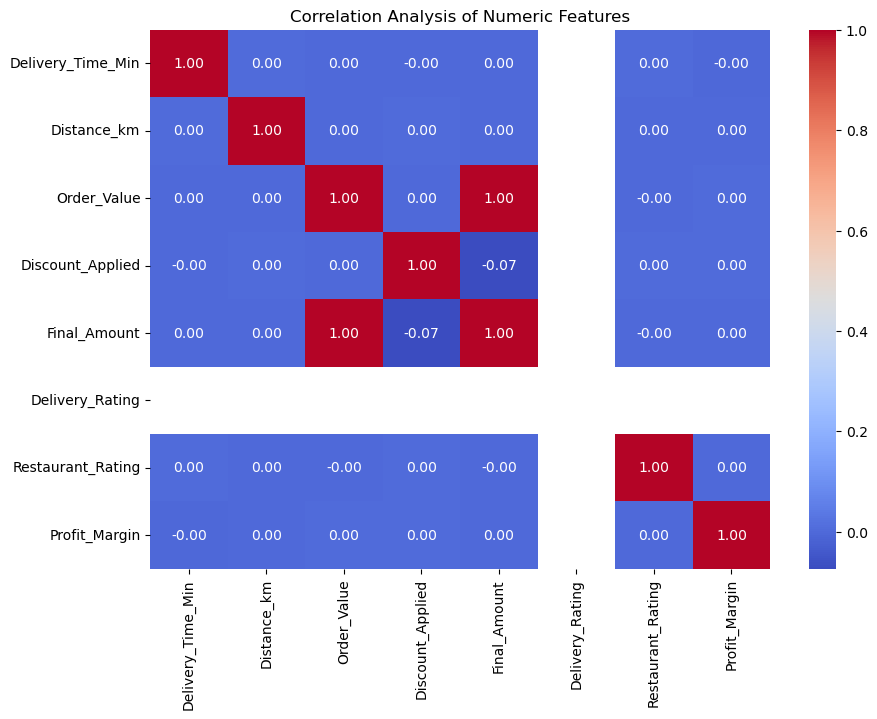

In [134]:
#●	Correlation analysis among numeric features




# Select numeric columns
numeric_cols = [
    'Delivery_Time_Min', 'Distance_km', 'Order_Value',
    'Discount_Applied', 'Final_Amount',
    'Delivery_Rating', 'Restaurant_Rating', 'Profit_Margin'
]

# Correlation matrix
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10,7))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)

plt.title('Correlation Analysis of Numeric Features')
plt.show()


In [39]:
# ●	Delivery performance categories



def delivery_performance(time):
    if time <= 25:
        return 'Fast'
    elif time <= 45:
        return 'On-time'
    else:
        return 'Delayed'

# Apply only for delivered orders
df['Delivery_Performance'] = df['Delivery_Time_Min'].apply(
    lambda x: delivery_performance(x) if pd.notna(x) else None
)


In [40]:
# ●	Profit margin percentage
# Avoid division by zero
df['Profit_Margin_Percentage'] = (
    df['Profit_Margin'] / df['Order_Value']
) * 100


In [41]:
df['Profit_Margin_Percentage']

0        0.010860
1        0.009858
2        0.010568
3        0.000000
4        0.032258
           ...   
99995    0.073276
99996    0.000000
99997    0.000000
99998    0.036759
99999    0.000000
Name: Profit_Margin_Percentage, Length: 100000, dtype: float64

In [39]:
df[['Order_Value', 'Profit_Margin', 'Profit_Margin_Percentage']].head(10)


Order_Value  Profit_Margin  Profit_Margin_Percentage
0       1197.0           0.13                  0.010860
1       4869.0           0.48                  0.009858
2        757.0           0.08                  0.010568
3       1197.0           0.00                  0.000000
4        372.0           0.12                  0.032258
5       1197.0           0.24                  0.020050
6       1197.0           0.02                  0.001671
7       3506.0           0.18                  0.005134
8        525.0           0.08                  0.015238
9       4691.0           0.03                  0.000640

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Order_ID                  100000 non-null  object        
 1   Customer_ID               100000 non-null  object        
 2   Customer_Gender           100000 non-null  object        
 3   City                      100000 non-null  object        
 4   Area                      100000 non-null  object        
 5   Restaurant_ID             100000 non-null  object        
 6   Restaurant_Name           100000 non-null  object        
 7   Cuisine_Type              100000 non-null  object        
 8   Order_Date                100000 non-null  datetime64[ns]
 9   Delivery_Time_Min         84964 non-null   float64       
 10  Distance_km               100000 non-null  float64       
 11  Order_Value               100000 non-null  float64       
 12  Dis

In [43]:
# Store Data in MySQL using SQLAlchemy
!pip install sqlalchemy pymysql

In [44]:
!pip install mysql-connector-python

In [45]:
import mysql.connector
import urllib.parse
from sqlalchemy import create_engine
from sqlalchemy import text

In [46]:
# Database Connection

username='root'
password=urllib.parse.quote_plus("Vidhyaguvi@25")
host='localhost'
port='3306'
database='db_2025'
engine=create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")
try:
    with engine.connect() as conn:
        print("success")
except Exception as e:
    print(e)

success


In [47]:
create_table_sql="""
CREATE TABLE IF NOT EXISTS onlinefood_delivery
(    Order_ID                    varchar(100)       primary key 	,
    Customer_ID                 varchar(100)        	,
    Customer_Gender             varchar(100)        	,
    City                        varchar(100)        	,
    Area                        varchar(100)        	,
    Restaurant_ID               varchar(100)        	,
    Restaurant_Name             varchar(100)        	,
    Cuisine_Type                varchar(100)        	,
    Order_Date                  datetime	,
    Delivery_Time_Min           float       	,
   Distance_km                 float       	,
   Order_Value                 float       	,
   Discount_Applied            float       	,
   Final_Amount                float       	,
   Payment_Mode                varchar(100)        	,
   Order_Status                varchar(100)        	,
   Cancellation_Reason         varchar(100)        	,
   Delivery_Partner_ID         varchar(100)        	,
   Delivery_Rating                 varchar(100)        	,
   Restaurant_Rating          float       	,
   Order_Day                   varchar(100)        	,
   Peak_Hour                   varchar(100)        	,
   Profit_Margin               float       	,
   Delivery_Performance         varchar(100)        	,
   Profit_Margin_Percentage    float       	);
"""

with engine.connect()as conn:
    conn.execute(text(create_table_sql))
    conn.commit()


In [48]:
# Insert into table

df.to_sql(
    "onlinefood_delivery",
    engine,
    if_exists="append",
    index=False,
    chunksize=1000
)

100000

In [50]:
# Analitcal task

from sqlalchemy import Table, MetaData
metadata = MetaData()
onlinefood_delivery = Table(
    "onlinefood_delivery",
    metadata,
    autoload_with=engine
)


In [57]:
# 1.	Identify top-spending customers


from sqlalchemy import select, func, desc

query = (
    select(
        onlinefood_delivery.c.Customer_ID,
        func.sum(onlinefood_delivery.c.Final_Amount).label("total_spent")
    )
    .group_by(onlinefood_delivery.c.Customer_ID)
    .order_by(desc("total_spent"))
    .limit(10)
)

with engine.connect() as conn:
    result = conn.execute(query)
    rows = result.mappings().all() 

for row in rows:
    print(f"Customer_ID: {row.Customer_ID}",
          f"total_spent: { row.total_spent}")


Customer_ID: CUST5267 total_spent: 51827.0
Customer_ID: CUST1606 total_spent: 51171.0
Customer_ID: CUST6706 total_spent: 47389.0
Customer_ID: CUST6252 total_spent: 45925.0
Customer_ID: CUST5534 total_spent: 45218.0
Customer_ID: CUST1239 total_spent: 44983.0
Customer_ID: CUST6457 total_spent: 44401.0
Customer_ID: CUST4431 total_spent: 44335.0
Customer_ID: CUST1968 total_spent: 44281.0
Customer_ID: CUST6293 total_spent: 44211.0


In [58]:
#2.2.	Analyze age group vs order value
from sqlalchemy import select, func

query = (
    select(
        onlinefood_delivery.c.Customer_Gender,
        func.round(
            func.avg(onlinefood_delivery.c.Final_Amount), 2
        ).label("avg_order_value")
    )
    .group_by(onlinefood_delivery.c.Customer_Gender)
)

with engine.connect() as conn:
    result = conn.execute(query)
    rows = result.mappings().all() 

for row in rows:
    print(f"Gender:{row.Customer_Gender}",
          f"Avg_order_value:{row.avg_order_value}")



Gender:male Avg_order_value:1695.61
Gender:female Avg_order_value:1712.61
Gender:other Avg_order_value:1696.58


In [63]:
#3.3.	Weekend vs weekday order patterns



from sqlalchemy import select, func

query = (
    select(
        onlinefood_delivery.c.Order_Day,
        func.count().label("total_orders")
    )
    .group_by(onlinefood_delivery.c.Order_Day)
)

with engine.connect() as conn:
    result = conn.execute(query)
    rows = result.mappings().all() 

for row in rows:
    print(f"Order_day:{row.Order_Day}",f"Total_order:{ row.total_orders}")


Order_day:Weekend Total_order:28630
Order_day:Weekday Total_order:71370


In [64]:
#4.4.	Monthly revenue trends
from sqlalchemy import select, func

query = (
    select(
        func.date_format(
            onlinefood_delivery.c.Order_Date, '%Y-%m'
        ).label("month"),
        func.sum(onlinefood_delivery.c.Final_Amount).label("total_revenue")
    )
    .group_by("month")
    .order_by("month")
)

with engine.connect() as conn:
    result = conn.execute(query)
    rows = result.mappings().all() 

for row in rows:
    print(f"Month:{row.month}", f"Total_revenue:{row.total_revenue}")



Month:2024-01 Total_revenue:14481750.0
Month:2024-02 Total_revenue:13401111.0
Month:2024-03 Total_revenue:14181215.0
Month:2024-04 Total_revenue:13769030.0
Month:2024-05 Total_revenue:14208417.0
Month:2024-06 Total_revenue:13954100.0
Month:2024-07 Total_revenue:16358748.0
Month:2024-08 Total_revenue:14049879.0
Month:2024-09 Total_revenue:14091960.0
Month:2024-10 Total_revenue:14004558.0
Month:2024-11 Total_revenue:13853648.0
Month:2024-12 Total_revenue:13680633.0


In [66]:
#5.5.	Impact of discounts on profit
from sqlalchemy import select, func

query = (
    select(
        onlinefood_delivery.c.Discount_Applied,
        func.round(
            func.avg(onlinefood_delivery.c.Profit_Margin_Percentage), 4
        ).label("avg_profit_margin")
    )
    .group_by(onlinefood_delivery.c.Discount_Applied)
    .order_by(onlinefood_delivery.c.Discount_Applied)
)

with engine.connect() as conn:
    result = conn.execute(query)
    rows = result.mappings().all() 

for row in rows:
    print(f"Dicount_Applied:{row.Discount_Applied}", f"Avg_Profit_margin:{row.avg_profit_margin}")


Dicount_Applied:0.0 Avg_Profit_margin:0.016
Dicount_Applied:20.0 Avg_Profit_margin:0.0161
Dicount_Applied:50.0 Avg_Profit_margin:0.0155
Dicount_Applied:100.0 Avg_Profit_margin:0.0159
Dicount_Applied:300.0 Avg_Profit_margin:0.0158


In [68]:
#6.6.	High-revenue cities and cuisines
from sqlalchemy import select, func, desc

query = (
    select(
        onlinefood_delivery.c.City,
        onlinefood_delivery.c.Cuisine_Type,
        func.sum(onlinefood_delivery.c.Final_Amount).label("total_revenue")
    )
    .group_by(
        onlinefood_delivery.c.City,
        onlinefood_delivery.c.Cuisine_Type
    )
    .order_by(desc("total_revenue"))
    .limit(10)
)

with engine.connect() as conn:
    result = conn.execute(query)
    rows = result.mappings().all() 

for row in rows:
    print(f"City:{row.City}",f"Cuisine_Type:{row.Cuisine_Type}",f"total_revenue:{row.total_revenue}")
    



City:Hyderabad Cuisine_Type:indian total_revenue:19160830.0
City:Bangalore Cuisine_Type:indian total_revenue:9635171.0
City:Chennai Cuisine_Type:indian total_revenue:9626497.0
City:Hyderabad Cuisine_Type:arabian total_revenue:9544391.0
City:Delhi Cuisine_Type:indian total_revenue:9519527.0
City:Hyderabad Cuisine_Type:italian total_revenue:9473380.0
City:Mumbai Cuisine_Type:indian total_revenue:9464510.0
City:Hyderabad Cuisine_Type:mexican total_revenue:9451802.0
City:Hyderabad Cuisine_Type:chinese total_revenue:9382666.0
City:Bangalore Cuisine_Type:mexican total_revenue:4934169.0


In [69]:
#7.7.	Average delivery time by city



from sqlalchemy import select, func, desc

query = (
    select(
        onlinefood_delivery.c.City,
        func.round(
            func.avg(onlinefood_delivery.c.Delivery_Time_Min), 2
        ).label("avg_delivery_time")
    )
    .group_by(onlinefood_delivery.c.City)
    .order_by(desc("avg_delivery_time"))
)

with engine.connect() as conn:
    result = conn.execute(query)
    rows = result.mappings().all() 

for row in rows:
    
    print(f"City:{row.City}",f"avg_delivery_time:{row.avg_delivery_time}")



City:Mumbai avg_delivery_time:125.79
City:Hyderabad avg_delivery_time:125.19
City:Delhi avg_delivery_time:125.03
City:Chennai avg_delivery_time:124.34
City:Bangalore avg_delivery_time:124.33


In [70]:
# 8.8.	Distance vs delivery delay analysis


from sqlalchemy import select, func

distance_bucket = func.round(
    onlinefood_delivery.c.Distance_km, 0
).label("distance_bucket")

query = (
    select(
        distance_bucket,
        func.round(
            func.avg(onlinefood_delivery.c.Delivery_Time_Min), 2
        ).label("avg_delivery_time")
    )
    .group_by(distance_bucket)
    .order_by(distance_bucket)
)

with engine.connect() as conn:
    result = conn.execute(query)
    rows = result.mappings().all() 

for row in rows:
  
    print(f"distance_bucket:{row.distance_bucket}",f"avg_delivery_time:{ row.avg_delivery_time}")



distance_bucket:1.0 avg_delivery_time:126.26
distance_bucket:2.0 avg_delivery_time:124.76
distance_bucket:3.0 avg_delivery_time:123.49
distance_bucket:4.0 avg_delivery_time:123.12
distance_bucket:5.0 avg_delivery_time:123.27
distance_bucket:6.0 avg_delivery_time:124.14
distance_bucket:7.0 avg_delivery_time:124.75
distance_bucket:8.0 avg_delivery_time:125.19
distance_bucket:9.0 avg_delivery_time:125.93
distance_bucket:10.0 avg_delivery_time:124.87
distance_bucket:15.0 avg_delivery_time:133.74
distance_bucket:16.0 avg_delivery_time:124.44
distance_bucket:17.0 avg_delivery_time:124.67
distance_bucket:18.0 avg_delivery_time:124.46
distance_bucket:19.0 avg_delivery_time:125.38
distance_bucket:20.0 avg_delivery_time:127.04
distance_bucket:21.0 avg_delivery_time:122.89
distance_bucket:22.0 avg_delivery_time:124.8
distance_bucket:23.0 avg_delivery_time:127.41
distance_bucket:24.0 avg_delivery_time:125.67
distance_bucket:25.0 avg_delivery_time:127.22
distance_bucket:26.0 avg_delivery_time:127.2

In [71]:
# 9.9.	Delivery rating vs delivery time



from sqlalchemy import select, func

query = (
    select(
        onlinefood_delivery.c.Delivery_Rating,
        func.round(
            func.avg(onlinefood_delivery.c.Delivery_Time_Min), 2
        ).label("avg_delivery_time")
    )
    .group_by(onlinefood_delivery.c.Delivery_Rating)
    .order_by(onlinefood_delivery.c.Delivery_Rating)
)

with engine.connect() as conn:
    result = conn.execute(query)
    rows = result.mappings().all() 

for row in rows:
    
    print(f"Delivery_Rating:{row.Delivery_Rating}",f"avg_delivery_time:{row.avg_delivery_time}")


Delivery_Rating:None avg_delivery_time:124.41
Delivery_Rating:1 avg_delivery_time:125.05
Delivery_Rating:2 avg_delivery_time:124.64
Delivery_Rating:3 avg_delivery_time:124.67
Delivery_Rating:4 avg_delivery_time:126.0
Delivery_Rating:5 avg_delivery_time:125.07


In [72]:
# 10.10.	Top-rated restaurants


from sqlalchemy import select, func, desc

query = (
    select(
        onlinefood_delivery.c.Restaurant_Name,
        func.round(
            func.avg(onlinefood_delivery.c.Restaurant_Rating), 2
        ).label("avg_rating")
    )
    .group_by(onlinefood_delivery.c.Restaurant_Name)
    .order_by(desc("avg_rating"))
    .limit(10)
)

with engine.connect() as conn:
    result = conn.execute(query)
    rows = result.mappings().all() 

for row in rows:
   
    print(f"Restaurant_Name:{row.Restaurant_Name}",f"avg_rating:{row.avg_rating}")



Restaurant_Name:Restaurant_1 avg_rating:4.33
Restaurant_Name:Restaurant_101 avg_rating:4.33
Restaurant_Name:Restaurant_162 avg_rating:4.32
Restaurant_Name:Restaurant_119 avg_rating:4.32
Restaurant_Name:Restaurant_260 avg_rating:4.31
Restaurant_Name:Restaurant_234 avg_rating:4.31
Restaurant_Name:Restaurant_204 avg_rating:4.3
Restaurant_Name:Restaurant_410 avg_rating:4.3
Restaurant_Name:Restaurant_446 avg_rating:4.3
Restaurant_Name:Restaurant_158 avg_rating:4.3


In [73]:
# 11.11.	Cancellation rate by restaurant
from sqlalchemy import select, func, case, desc

cancelled_count = func.count(
    case(
        (onlinefood_delivery.c.Order_Status == 'Cancelled', 1)
    )
)

total_count = func.count()

query = (
    select(
        onlinefood_delivery.c.Restaurant_Name,
        (cancelled_count * 100.0 / total_count).label("cancellation_rate")
    )
    .group_by(onlinefood_delivery.c.Restaurant_Name)
    .order_by(desc("cancellation_rate"))
)

with engine.connect() as conn:
    result = conn.execute(query)
    rows = result.mappings().all() 

for row in rows:
    
    print(f"Restaurant_Name:{row.Restaurant_Name}",f"cancellation_rate:{row.cancellation_rate}")


Restaurant_Name:Restaurant_391 cancellation_rate:21.93877551020408
Restaurant_Name:Restaurant_390 cancellation_rate:21.890547263681594
Restaurant_Name:Restaurant_477 cancellation_rate:21.59090909090909
Restaurant_Name:Restaurant_202 cancellation_rate:21.568627450980394
Restaurant_Name:Restaurant_373 cancellation_rate:21.465968586387433
Restaurant_Name:Restaurant_426 cancellation_rate:21.22641509433962
Restaurant_Name:Restaurant_299 cancellation_rate:21.1340206185567
Restaurant_Name:Restaurant_455 cancellation_rate:21.11111111111111
Restaurant_Name:Restaurant_113 cancellation_rate:20.975609756097562
Restaurant_Name:Restaurant_232 cancellation_rate:20.903954802259886
Restaurant_Name:Restaurant_437 cancellation_rate:20.673076923076923
Restaurant_Name:Restaurant_361 cancellation_rate:20.670391061452513
Restaurant_Name:Restaurant_492 cancellation_rate:20.512820512820515
Restaurant_Name:Restaurant_185 cancellation_rate:20.5
Restaurant_Name:Restaurant_322 cancellation_rate:20.476190476190474


In [74]:
# 1212.	Cuisine-wise performance
from sqlalchemy import select, func, desc

query = (
    select(
        onlinefood_delivery.c.Cuisine_Type,
        func.sum(onlinefood_delivery.c.Final_Amount).label("total_revenue")
    )
    .group_by(onlinefood_delivery.c.Cuisine_Type)
    .order_by(desc("total_revenue"))
)

with engine.connect() as conn:
    result = conn.execute(query)
    rows = result.mappings().all() 

for row in rows:
  
    print(f"Cuisine_Type:{row.Cuisine_Type}",f"total_revenue:{row.total_revenue}")



Cuisine_Type:indian total_revenue:57406535.0
Cuisine_Type:mexican total_revenue:28330767.0
Cuisine_Type:chinese total_revenue:28317523.0
Cuisine_Type:arabian total_revenue:28039302.0
Cuisine_Type:italian total_revenue:27940922.0


In [75]:
# 13.13.	Peak hour demand analysis



from sqlalchemy import select, func

query = (
    select(
        onlinefood_delivery.c.Peak_Hour,
        func.count().label("total_orders")
    )
    .group_by(onlinefood_delivery.c.Peak_Hour)
)

with engine.connect() as conn:
    result = conn.execute(query)
    rows = result.mappings().all() 

for row in rows:
  
    print(f"Peak_Hour:{row.Peak_Hour}",f"total_orders:{row.total_orders}")


Peak_Hour:1 total_orders:33453
Peak_Hour:None total_orders:32962
Peak_Hour:0 total_orders:33585


In [76]:
# 14.14.	Payment mode preferences
from sqlalchemy import select, func, desc

query = (
    select(
        onlinefood_delivery.c.Payment_Mode,
        func.count().label("total_orders")
    )
    .group_by(onlinefood_delivery.c.Payment_Mode)
    .order_by(desc("total_orders"))
)

with engine.connect() as conn:
    result = conn.execute(query)
    rows = result.mappings().all() 

for row in rows:
    
    print(f"Payment_Mode:{row.Payment_Mode}",f"total_orders:{row.total_orders}")



Payment_Mode:card total_orders:40005
Payment_Mode:wallet total_orders:20086
Payment_Mode:cod total_orders:19977
Payment_Mode:upi total_orders:19932


In [77]:
# 15.	Cancellation reason analysis
from sqlalchemy import select, func, desc

query = (
    select(
        onlinefood_delivery.c.Cancellation_Reason,
        func.count().label("total_cancellations")
    )
    .where(onlinefood_delivery.c.Order_Status == "Cancelled")
    .group_by(onlinefood_delivery.c.Cancellation_Reason)
    .order_by(desc("total_cancellations"))
)

with engine.connect() as conn:
    result = conn.execute(query)
    rows = result.mappings().all() 

for row in rows:
    
    print(f"Cancellation_Reason:{row.Cancellation_Reason}",f"total_cancellations:{row.total_cancellations}")


Cancellation_Reason:late delivery total_cancellations:9064
Cancellation_Reason:customer cancelled total_cancellations:2993
Cancellation_Reason:restaurant issue total_cancellations:2979
